In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [11]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [12]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.681414,2.201866,-1.219426,-0.984030,0.513395,1
1,1.828307,1.391153,-2.661264,-2.536505,0.633921,1
2,-0.220303,-0.413637,2.404727,-2.315664,0.546655,0
3,3.661770,-0.695171,0.738337,-2.928288,2.544418,0
4,0.461908,1.612020,-0.136328,0.434351,1.322635,1


In [13]:
# function for row sampling
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [14]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [15]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [19]:
df11=sample_rows(df,0.2)

In [20]:
df22=sample_rows(df,0.2)

In [21]:
df33=sample_rows(df,0.2)

In [27]:
print(df11.columns)
print(df22.columns)
print(df33.columns)

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')


In [32]:
clf1.fit(df11.iloc[:,0:2],df11.iloc[:,-1])
clf2.fit(df22.iloc[:,0:2],df22.iloc[:,-1])
clf3.fit(df33.iloc[:,0:2],df33.iloc[:,-1])

DecisionTreeClassifier()

In [22]:
d1=sample_features(df,0.7)

<ipython-input-14-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [23]:
d2=sample_features(df,0.7)

<ipython-input-14-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [24]:
d3=sample_features(df,0.7)

<ipython-input-14-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [26]:
print(d1.columns)
print(d2.columns)
print(d3.columns)

Index(['col3', 'col5', 'col4', 'target'], dtype='object')
Index(['col4', 'col2', 'col5', 'target'], dtype='object')
Index(['col4', 'col3', 'col2', 'target'], dtype='object')


In [31]:
clf1.fit(d1.iloc[:,0:2],d1.iloc[:,-1])
clf2.fit(d2.iloc[:,0:2],d2.iloc[:,-1])
clf3.fit(d3.iloc[:,0:2],d3.iloc[:,-1])

DecisionTreeClassifier()

In [16]:
df1 = combined_sampling(df,0.5,0.5)

<ipython-input-14-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [17]:
df2 = combined_sampling(df,0.5,0.5)

<ipython-input-14-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [18]:
df3 = combined_sampling(df,0.5,0.5)

<ipython-input-14-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [25]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col3', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [28]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [33]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [34]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9166666666666666, 'x[0] <= -0.427\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.5555555555555556, 0.75, 'x[1] <= 0.702\ngini = 0.271\nsamples = 31\nvalue = [5, 26]'),
 Text(0.4444444444444444, 0.5833333333333334, 'x[0] <= 0.289\ngini = 0.185\nsamples = 29\nvalue = [3, 26]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[0] <= 0.064\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[1] <= -0.876\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.7777777777777778, 0.25, 'x[1] <= -0.597\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.6666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples 

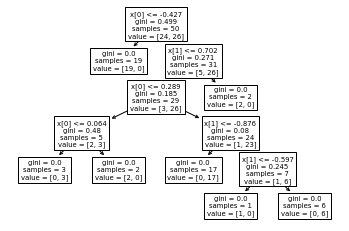

In [35]:
plot_tree(clf1)

[Text(0.5568181818181818, 0.9375, 'x[1] <= 2.303\ngini = 0.471\nsamples = 50\nvalue = [19, 31]'),
 Text(0.5113636363636364, 0.8125, 'x[0] <= -4.766\ngini = 0.416\nsamples = 44\nvalue = [13, 31]'),
 Text(0.4659090909090909, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5568181818181818, 0.6875, 'x[0] <= -0.256\ngini = 0.387\nsamples = 42\nvalue = [11, 31]'),
 Text(0.3409090909090909, 0.5625, 'x[1] <= 1.127\ngini = 0.293\nsamples = 28\nvalue = [5, 23]'),
 Text(0.18181818181818182, 0.4375, 'x[0] <= -3.492\ngini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.09090909090909091, 0.3125, 'x[1] <= 0.391\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.045454545454545456, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13636363636363635, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2727272727272727, 0.3125, 'x[1] <= 0.489\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.22727272727272727, 0.1875, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),

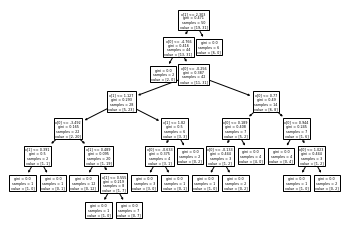

In [36]:
plot_tree(clf2)

[Text(0.6153846153846154, 0.9166666666666666, 'x[0] <= 0.439\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.46153846153846156, 0.75, 'x[1] <= 0.69\ngini = 0.393\nsamples = 26\nvalue = [19, 7]'),
 Text(0.38461538461538464, 0.5833333333333334, 'x[1] <= -0.322\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.23076923076923078, 0.4166666666666667, 'x[1] <= -1.647\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.15384615384615385, 0.25, 'x[1] <= -1.933\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5384615384615384, 0.4166666666666667, 'x[0] <= 0.157\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.46153846153846156, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6153846153846154, 0.25, 'gini = 

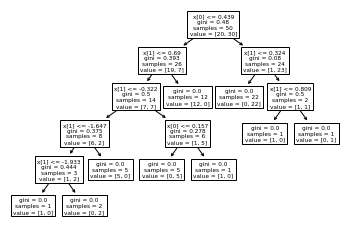

In [37]:
plot_tree(clf3)

In [38]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [39]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [40]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [41]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
94,0.478943,-1.677419,1.469881,-1.696062,1.250959,0
59,0.509128,-0.876017,2.371099,-1.454791,0.226664,0
19,-0.297505,-1.425405,1.123727,0.767341,0.099393,0
34,1.792405,-0.244260,-1.443291,-0.743561,1.811053,0
71,0.972566,1.124665,0.975464,-3.099360,0.873972,0
89,2.396698,-2.720964,1.135584,-1.222791,2.185378,0
32,-0.287665,1.603823,-0.787379,-1.312291,0.157717,0
9,1.403750,1.291453,-0.407276,-0.374122,0.089085,1
78,1.939099,-2.016154,1.151316,0.583358,0.785346,0
38,1.295393,0.724423,-0.195583,0.266329,1.705974,1


# List_Basic

In [1]:
my_underscore=[]

In [ ]:
my_list=[1,2,3]

In [ ]:
my_list=[1,"hello", 3]
print(my_list)

[1, 'hello', 3]


In [ ]:
my_list=["prince",[1, 2,3],['a']]

In [ ]:
my_list=["happy",[1,2,3]]
print(my_list[0][1])

a


In [ ]:
my_list=["happy",[1,2,3,4]]
print(my_list[1][3])

4


In [ ]:
my_list["happy", [1,2,3,4]]
print(my_list[4.0])

TypeError: ignored

In [ ]:
l=['a','b',['cc','dd',['eee','fff']],'g','h']
print['cc','dd',['eee','fff']]

TypeError: ignored

In [ ]:
print(l[-1])

h


In [ ]:
print h

SyntaxError: ignored

In [ ]:
print(eee)

NameError: ignored

In [ ]:
l=['a','b',['cc','dd'['eee','fff']],'g','h']
print(['eee','fff'])

TypeError: ignored

In [ ]:
l=['p','r','i','n','c','e']
print(l[0])
print(l[2]) 
print(l[6])

p
i


IndexError: ignored

In [ ]:
l=['p','r','i','n','c','e']
print(l[2:5])
print(l[ :5])
print(l[5: ])
print(l[ : ])
print(l[-5:-2])

['i', 'n', 'c']
['p', 'r', 'i', 'n', 'c']
['e']
['p', 'r', 'i', 'n', 'c', 'e']
['r', 'i', 'n']


In [ ]:
t=(10,20,30)
t[0]

10

In [ ]:
del t[2]

TypeError: ignored

In [ ]:
a='Princeee'
a[4:7]

'cee'

In [ ]:
a.count('e')

3

In [ ]:
num=[10,20,30,40,50]
for k in num :
   print(k)

10
20
30
40
50


In [ ]:
s='coconut'
s[4:7]

'nut'

In [ ]:
s='coconut'
s.count('o')

2

In [ ]:
s='coconut'
s.index('o')

1

In [ ]:
s='coconut'
z=s+'juice'

In [ ]:
s=(10,30,20,10) 
s[1:3]

(30, 20)

In [ ]:
s.count(10)

2

In [ ]:
s.index(10)

0

In [ ]:
s+(40,50)

(10, 30, 20, 10, 40, 50)

In [ ]:
s=[10,30,20,10]
s[1:3]

[30, 20]

In [ ]:
s.count(10)

2

In [ ]:
s.index(10)

0

In [ ]:
s+(40,50)

TypeError: ignored

In [ ]:
s+[40,50]

[10, 30, 20, 10, 40, 50]

In [ ]:
l=[[1,2,3],[4,5,6],[7,8,9]]
l[0]

[1, 2, 3]

In [ ]:
l=[[1,2,3],[4,5,6],[7,8,9]]
l[0][1]

2

In [ ]:
l=[[1,2,3],[4,5,6],[7,8,9]]
l[1]

[4, 5, 6]

In [ ]:
 l=[[1,2,3],[4,5,6],[7,8,9]]
l[1][1]

5

In [ ]:
 num=[10,20,30,40,50]
for k in num :
   print(k)

10
20
30
40
50


In [ ]:
for k in [4,2,3,1]:
  print(k)

4
2
3
1


In [ ]:
 for k in ['apple','banana','pear']:
  print(k)

apple
banana
pear


In [ ]:
 for k in (4,2,3,1):
  print(k)

4
2
3
1


In [ ]:
 for k in 'apple':
  print(k)

a
p
p
l
e


In [ ]:
for k in range(0,11) :
  print(k)

0
1
2
3
4
5
6
7
8
9
10


In [ ]:
 for k in range(0,102,2) :
  print(k)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100


In [ ]:
n=[10,20,30]
for k in range(len(n)) :
  print(n[k])

10
20
30


In [ ]:
n=[10,20,30]
for k in range(len(n)-1,-1,-1):
  print(n[k])

30
20
10


In [ ]:
sum=0
n=[10,20,30,40,50]
for k in n :
  sum=sum+k
  print("the average",sum/len(n))

the average 2.0
the average 6.0
the average 12.0
the average 20.0
the average 30.0


In [ ]:
sum=0
n=[10,20,30,40,50]
for k in range(len(n)) :
  sum=sum+n[k]
  print("the average",sum/len(n))

the average 2.0
the average 6.0
the average 12.0
the average 20.0
the average 30.0


In [ ]:
 
t=(10,20,30) 
t.insert(1,15)

AttributeError: ignored